In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import numpy as np

features_for_mood = ['energy', 'liveness', 'tempo', 'speechiness',
                                     'acousticness', 'instrumentalness', 'danceability', 'duration_ms',
                                     'loudness', 'valence']

data = pd.read_csv('tracks2.csv')
hyper_opt = False

#split into trainval and test
trainx, testx, trainy, testy = train_test_split(data[features_for_mood], data['mood'], test_size = 0.33,
                                                random_state = 42, stratify=data['mood'])

scaler = StandardScaler()
train_scaled = scaler.fit_transform(trainx)

nn = MLPClassifier(max_iter = 15000, alpha=1.0, hidden_layer_sizes=8)
scores = cross_val_score(nn, train_scaled, trainy, cv=5)
print ("cv score: " + str(scores.mean()))

if hyper_opt:
    params = {"alpha": np.logspace(-4, 2, 7), 'hidden_layer_sizes': [1, 2, 5, 10, 20, 50, 100]}
    clf = GridSearchCV(nn, params)
    clf.fit(train_scaled, trainy)
    print("hyperparam optimized score : " + str(clf.best_score_))
    import pdb
    pdb.set_trace()

cv score: 0.6546981207516993


In [6]:
from sklearn.model_selection import cross_validate

In [41]:
results = cross_validate(nn, train_scaled, trainy, return_train_score=True)

In [11]:
results

{'fit_time': array([1.32488894, 1.06492233, 1.31436992, 1.27747607, 1.37610912]),
 'score_time': array([0.00057769, 0.00084186, 0.00057745, 0.00087547, 0.0005815 ]),
 'test_score': array([0.65853659, 0.71311475, 0.68852459, 0.68852459, 0.68852459]),
 'train_score': array([0.79098361, 0.78118609, 0.79550102, 0.78936605, 0.79345603])}

In [ ]:
nn = MLPClassifier(hidden_layer_sizes=8, max_iter=15000, alpha=1.0)

In [11]:
nn.fit(train_scaled, trainy)
test_preds = nn.predict(scaler.transform(testx))
accuracy_score(test_preds, testy)

0.7019867549668874

In [12]:
import seaborn as sn
from sklearn.metrics import confusion_matrix

In [45]:
conf_matrix = confusion_matrix(testy, test_preds, labels = data['mood'].unique().tolist())

In [46]:
labels = data['mood'].unique().tolist()

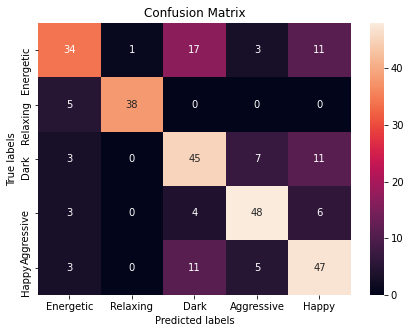

In [50]:
plt.rcParams['figure.figsize'] = (7,5)
ax = plt.subplot()
sn.heatmap(conf_matrix, annot=True)
#labels = data['mood'].tolist()
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,10)

In [45]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, val_scores = learning_curve(nn, train_scaled, trainy, cv=5)

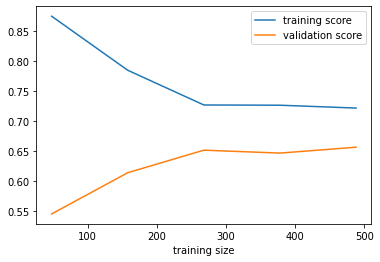

In [48]:
train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, label='training score')
plt.plot(train_sizes, val_scores_mean, label='validation score')
plt.xlabel('training size')
plt.legend()